In [1]:
import utils.notebooks as nb
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
from monai.losses import DiceLoss
import torch
from models.WNet2 import WNetSingleOutput
from monai.networks.nets import UNet
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="unet")

BATCH_SIZE = 4
EPOCHS = 1000
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = UNet(
            spatial_dims=3,
            in_channels=1,
            out_channels=1,
            channels=(8, 16, 32, 64, 128),
            strides=(2, 2, 2, 2),
            num_res_units=2,
        ).to(device)

train_dl = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
validation_dl = DataLoader(DicomDataset3D("data/validation.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
# pos_weight = torch.tensor([100]).to(device)
# criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight).to(device)
criterion = DiceLoss(sigmoid=True)
# model.load_state_dict(torch.load('./state_dicts/wnet_more_augment/best/wnet_more_augment_epoch_180_loss_0.0001.pk'))

In [2]:
nb.train(model, train_dl, validation_dl, optimizer, criterion, EPOCHS, writer, model_name='tmp')

epoch: 0
validating
dice score: 0.001553280291835731
tensor(0.9942, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 1
tensor(0.9817, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 2
tensor(0.9928, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 3
validating
dice score: 0.004387143062125785
tensor(0.9898, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 4
tensor(0.9948, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 5
tensor(0.9919, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 6
validating
dice score: 0.006520760388417341
tensor(0.9867, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 7
tensor(0.9928, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 8
tensor(0.9858, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 9
validating
dice score: 0.009978150663353485
tensor(0.9896, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 10
tensor(0.9847, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 11
tensor(0.9891, device='cuda:0', grad_fn=<MeanBackward0>)
epoch: 12
validating
dice scor

KeyboardInterrupt: 

In [ ]:
# torch.save(model.state_dict(), './state_dicts/easy_wnet.pk')
model.load_state_dict(torch.load('/home/casimir/UNI/WS_22/KAP/state_dicts/monai_dice/best/monai_dice_epoch_460_loss_0.0025.pk'))

<All keys matched successfully>

torch.Size([4, 1, 160, 176, 176])


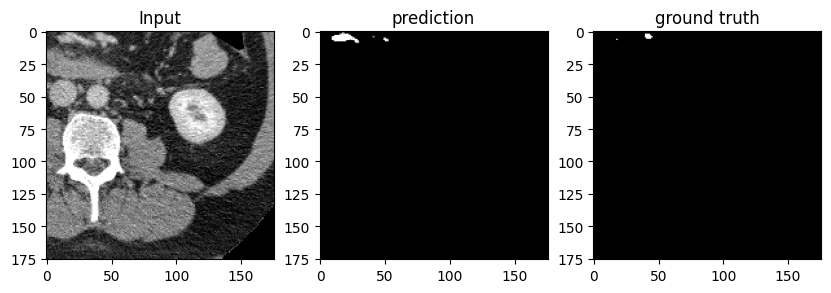

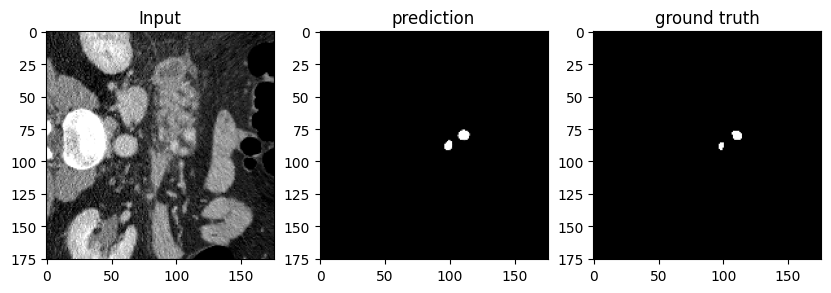

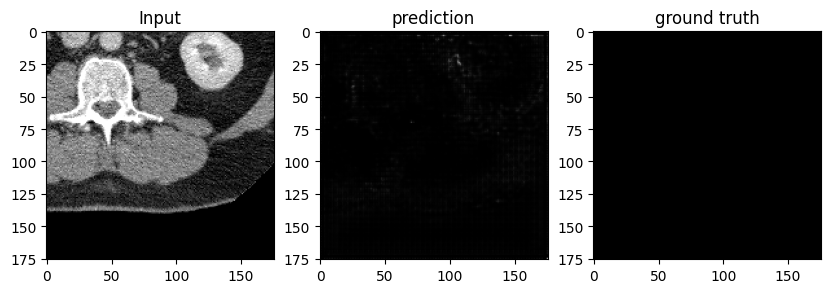

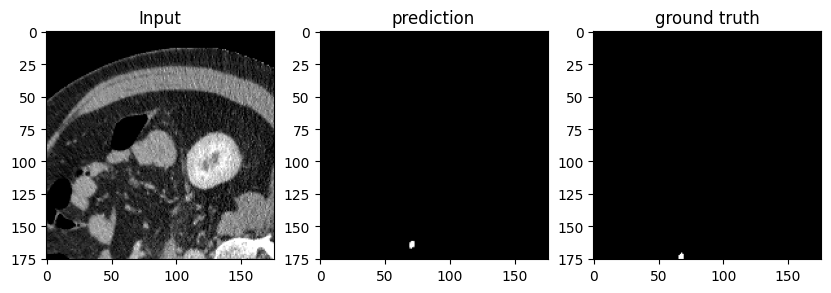

torch.Size([4, 1, 160, 176, 176])


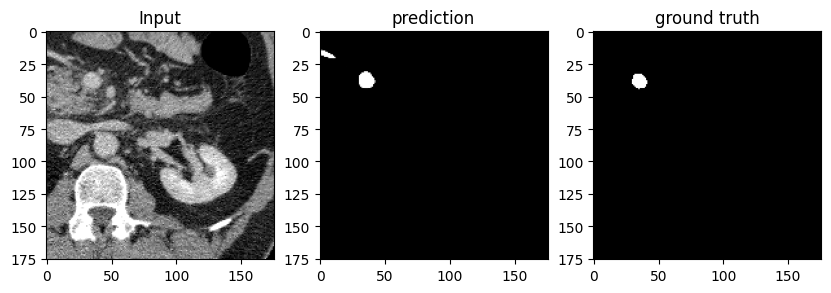

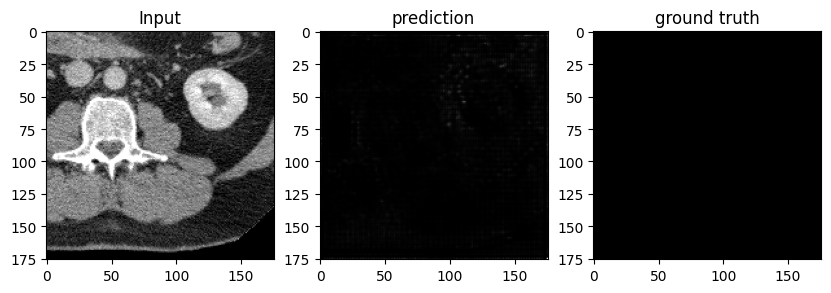

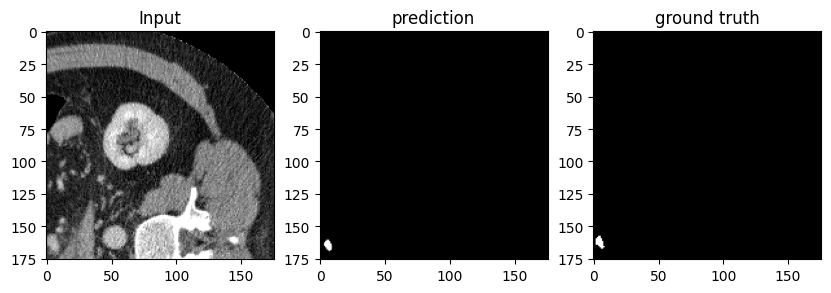

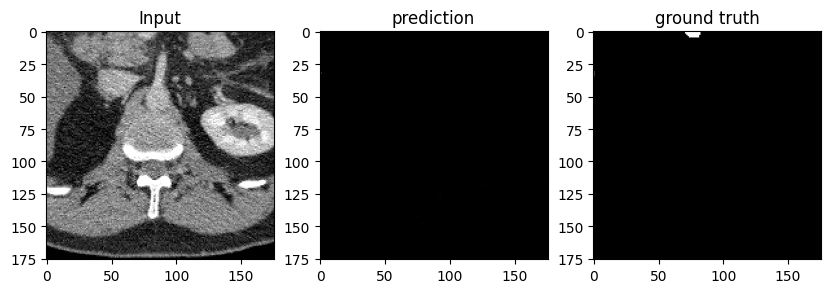

torch.Size([4, 1, 160, 176, 176])


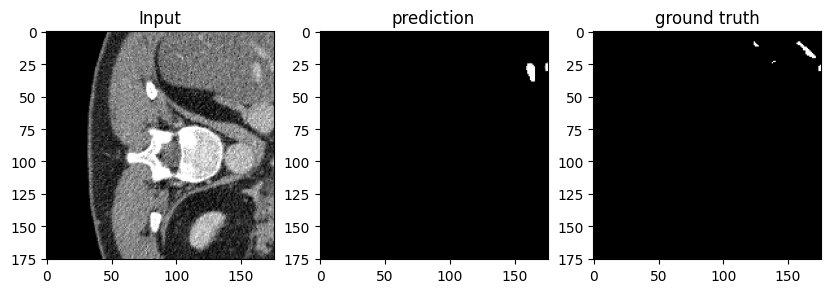

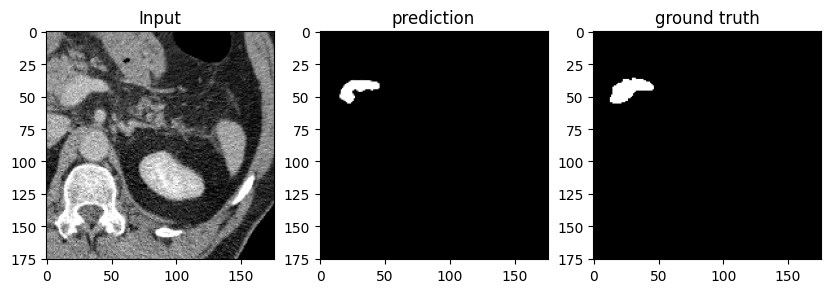

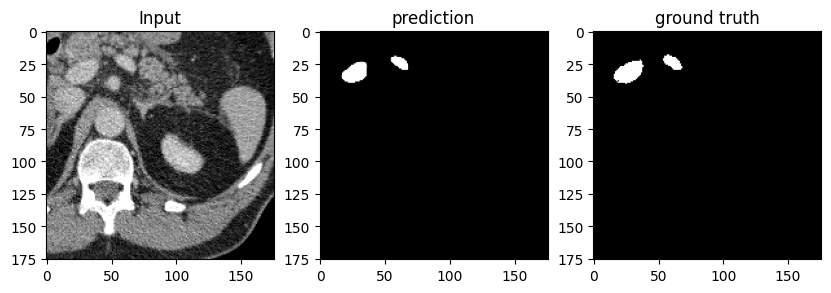

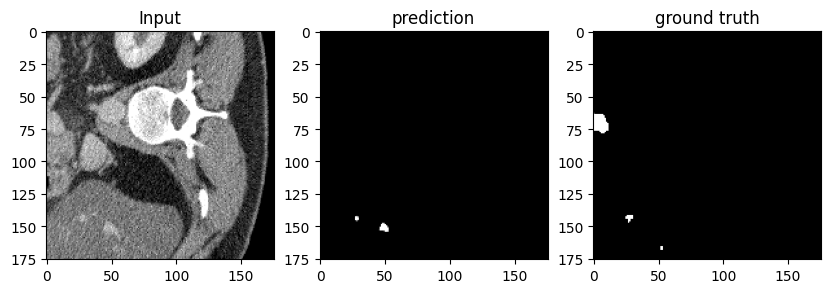

torch.Size([4, 1, 160, 176, 176])


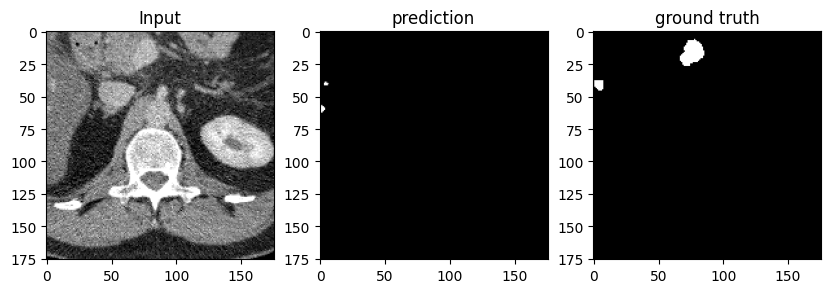

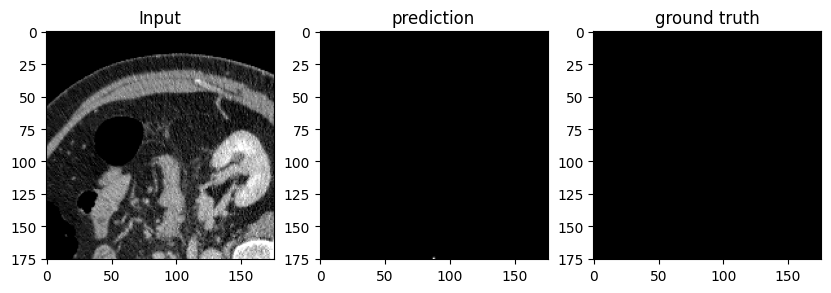

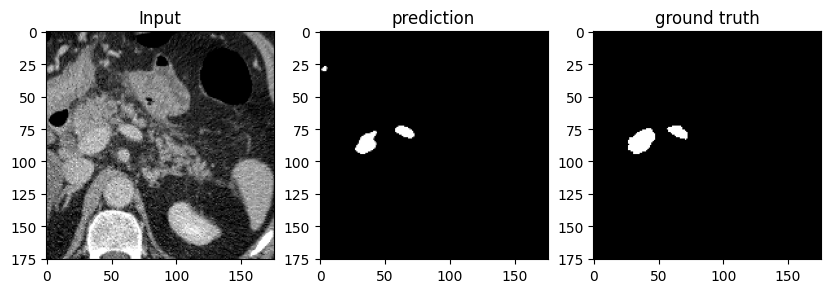

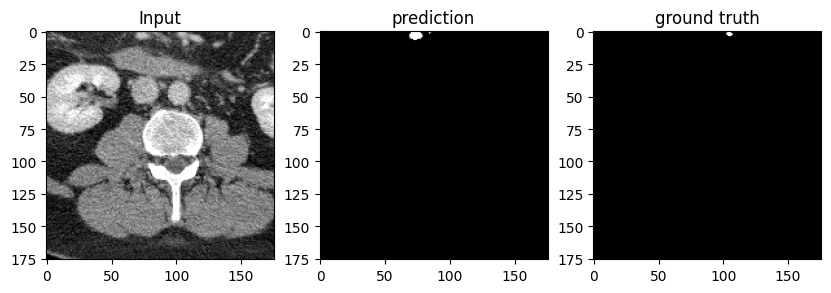

torch.Size([4, 1, 160, 176, 176])


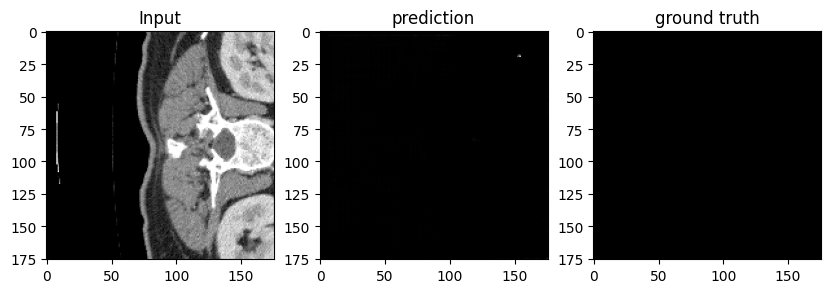

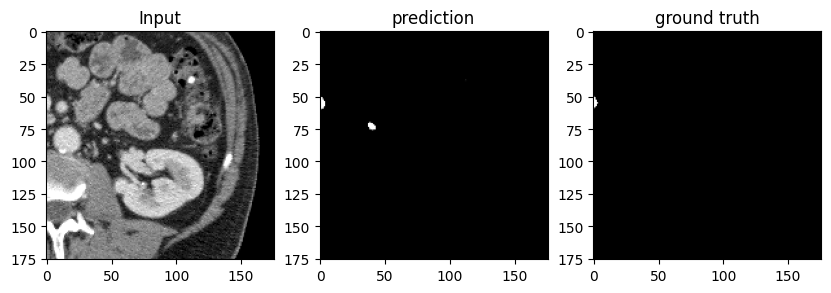

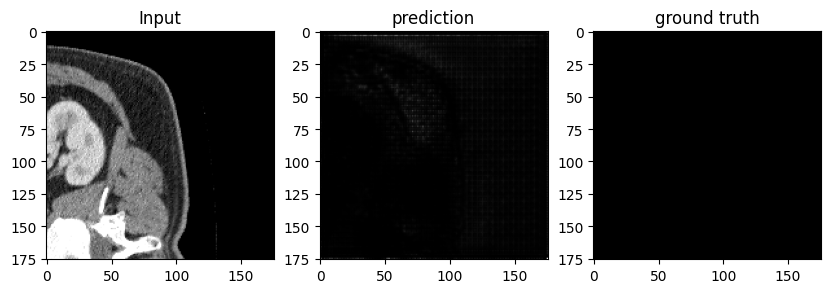

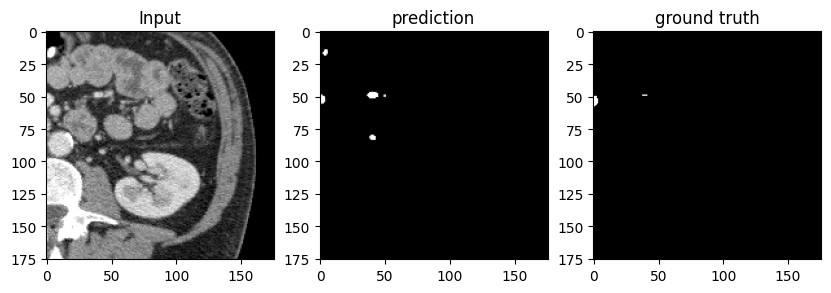

torch.Size([4, 1, 160, 176, 176])


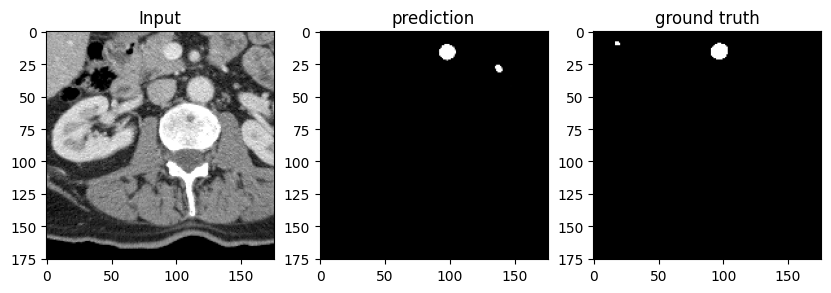

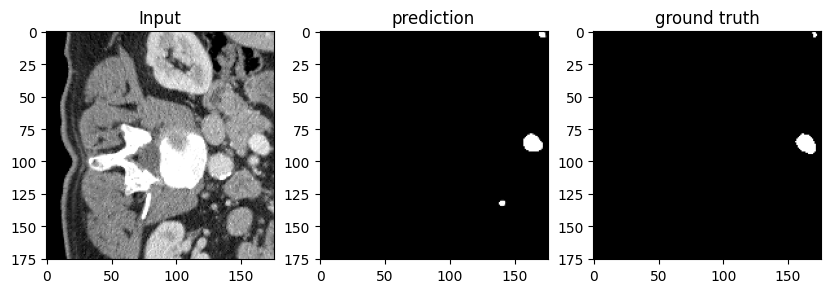

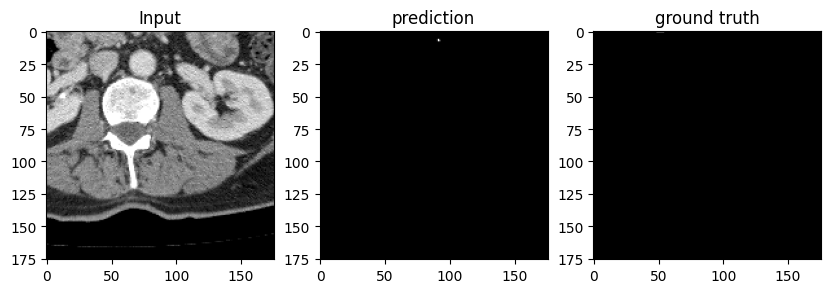

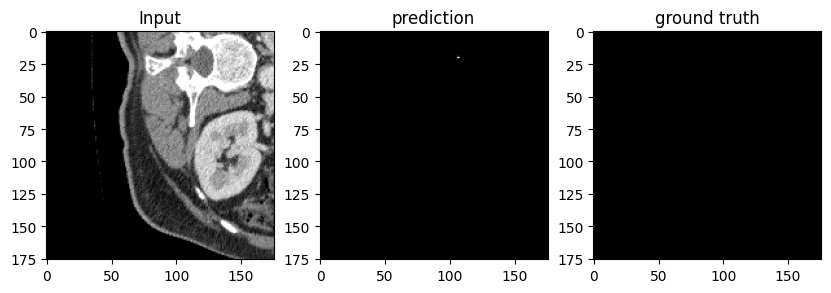

torch.Size([4, 1, 160, 176, 176])


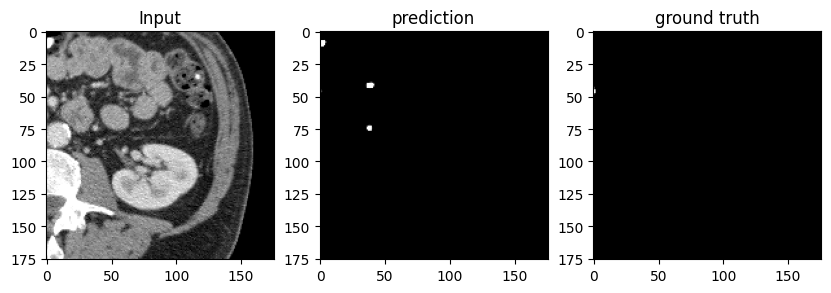

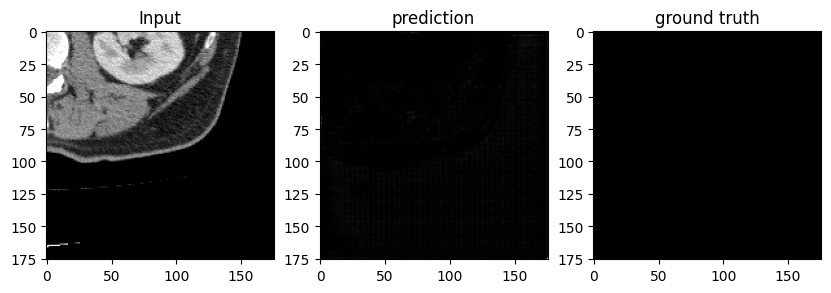

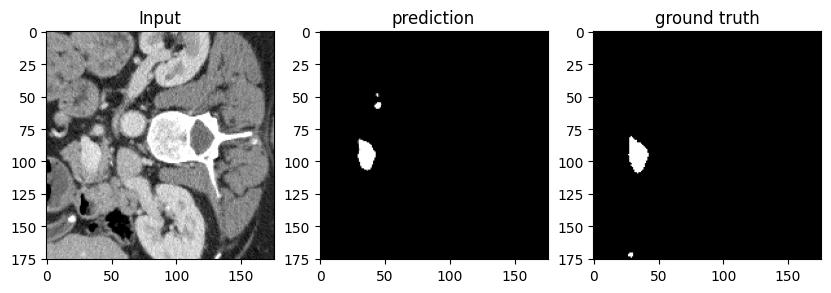

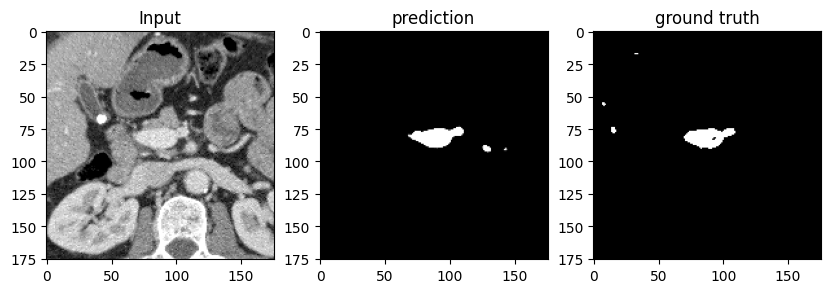

torch.Size([4, 1, 160, 176, 176])


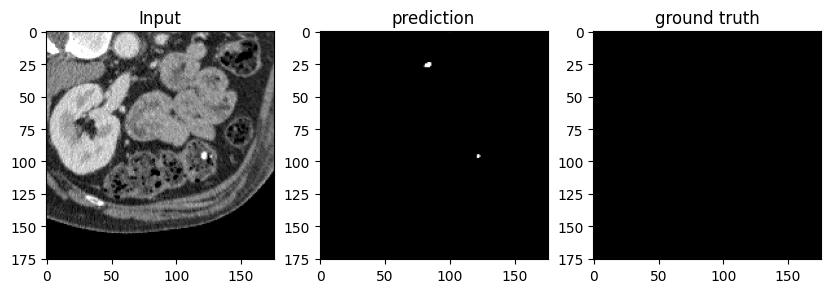

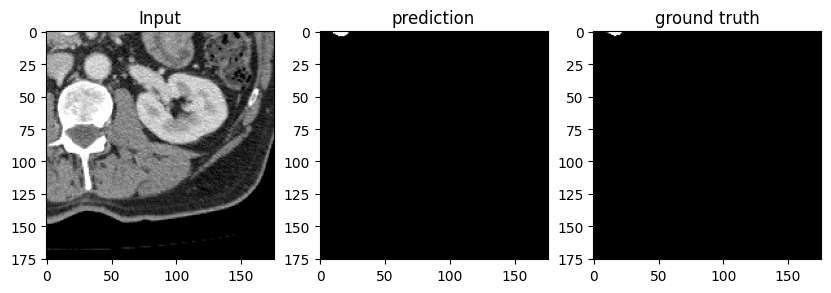

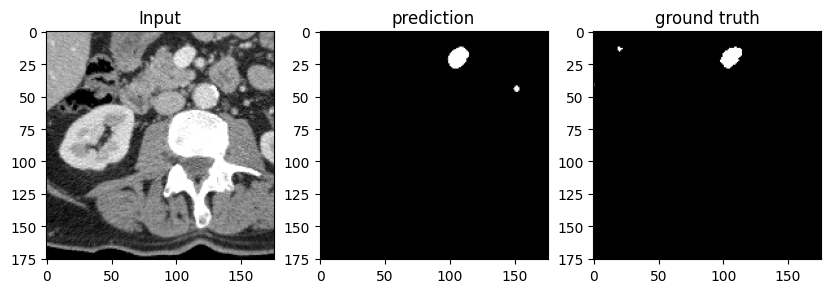

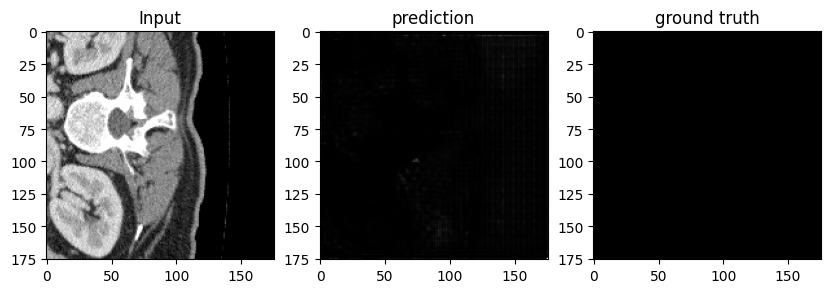

torch.Size([4, 1, 160, 176, 176])


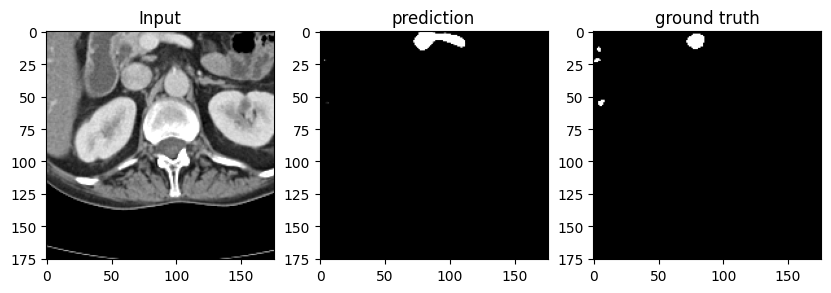

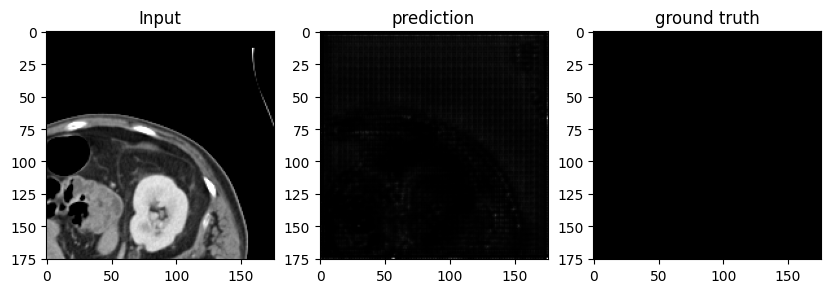

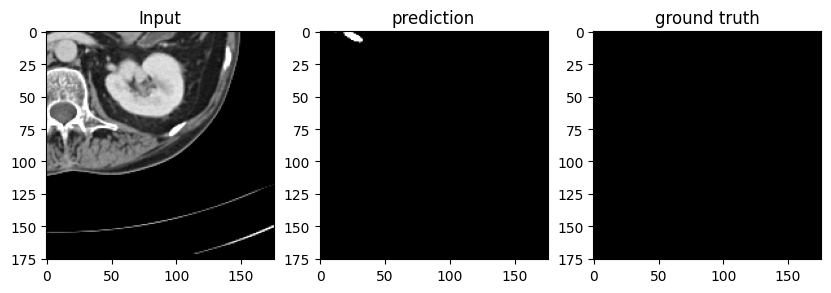

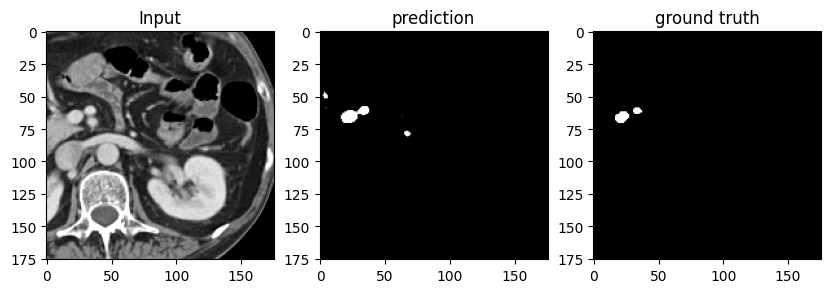

torch.Size([4, 1, 160, 176, 176])


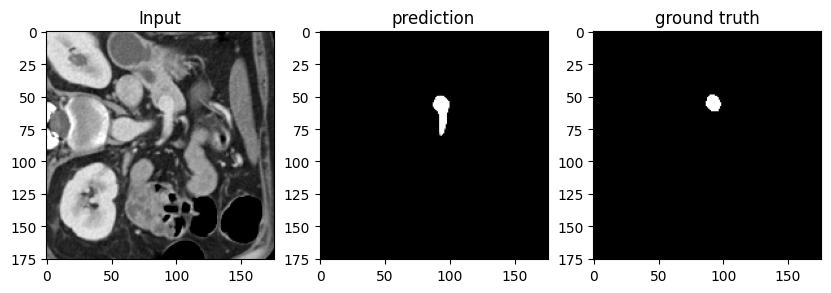

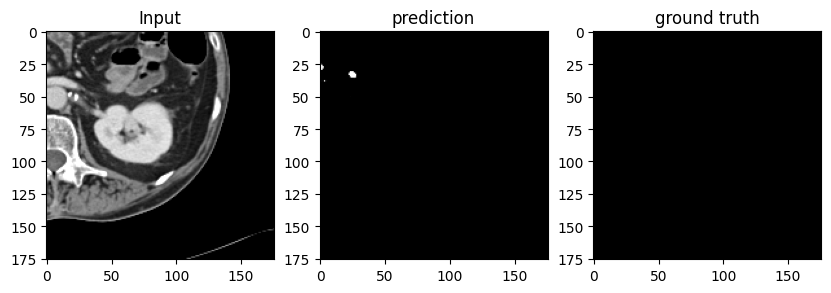

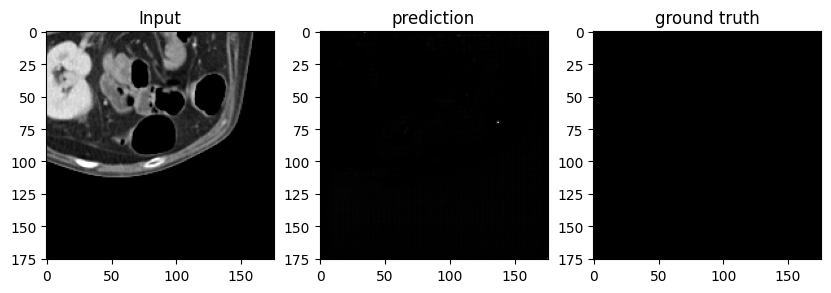

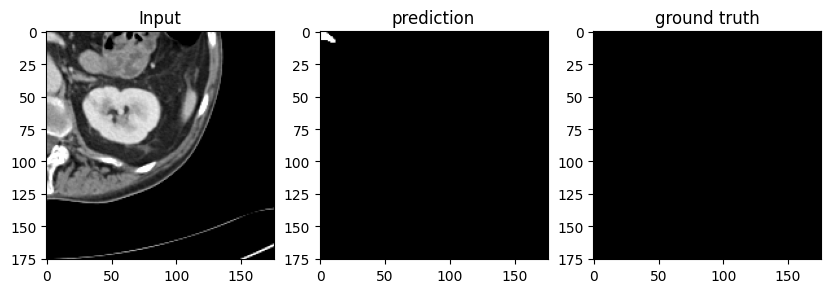

torch.Size([4, 1, 160, 176, 176])


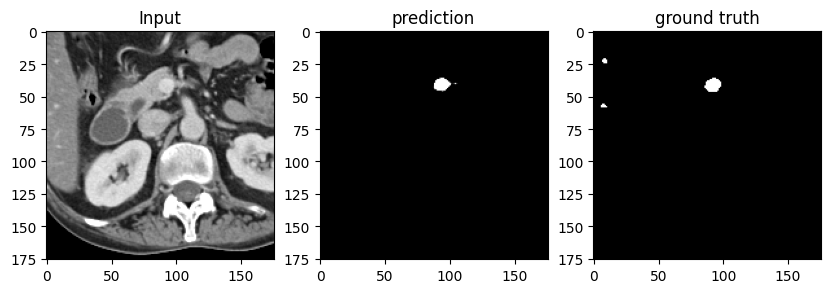

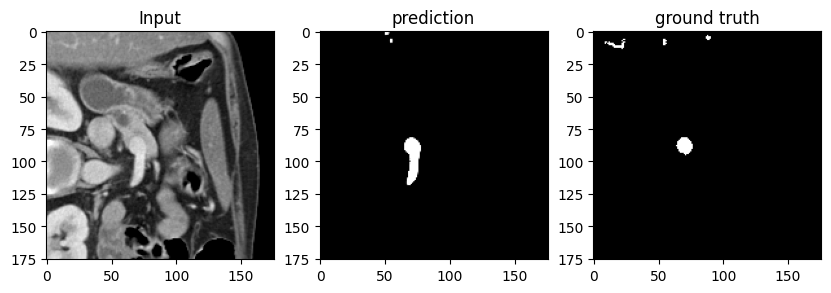

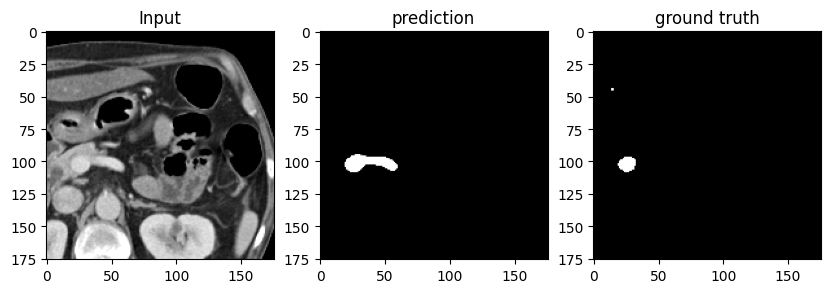

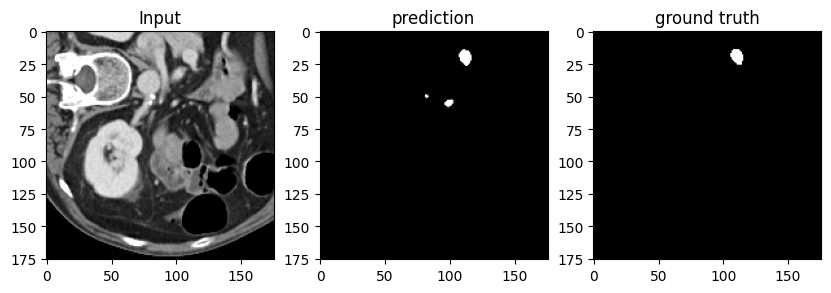

torch.Size([4, 1, 160, 176, 176])


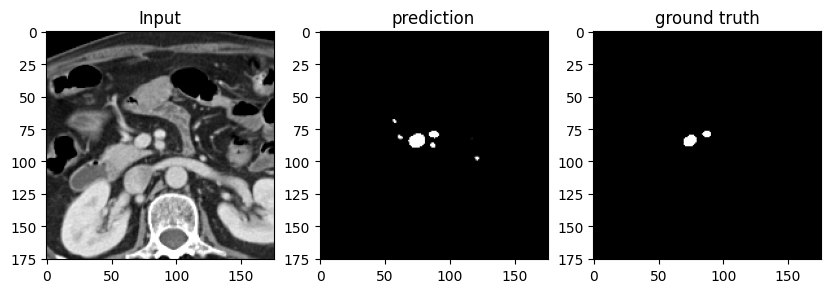

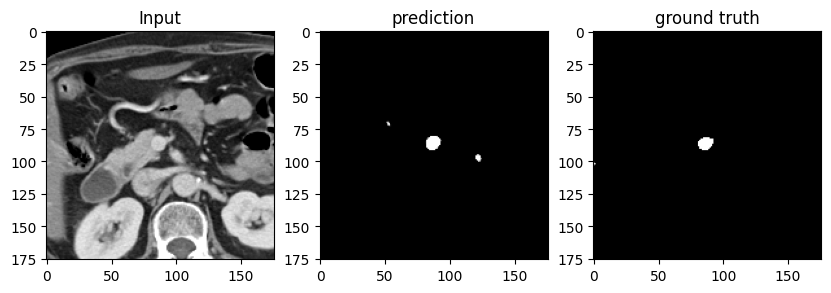

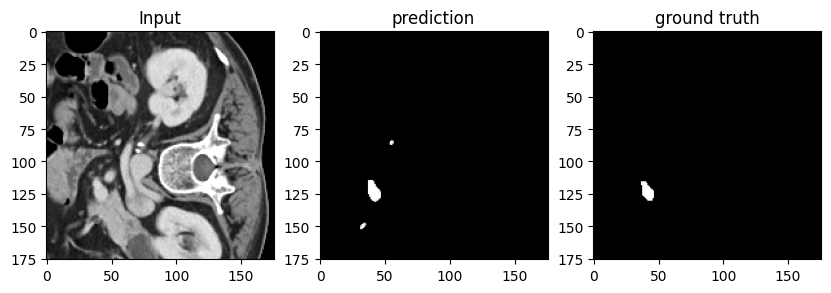

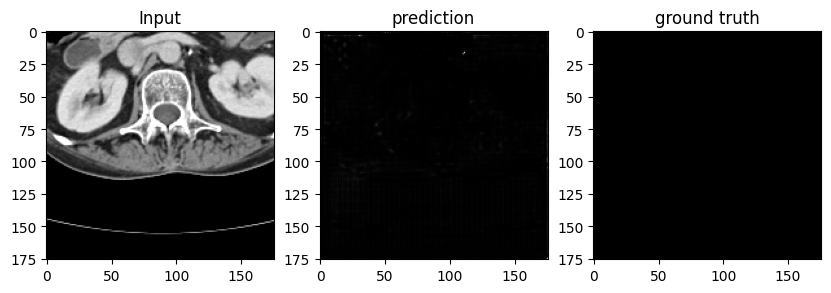

torch.Size([4, 1, 160, 176, 176])


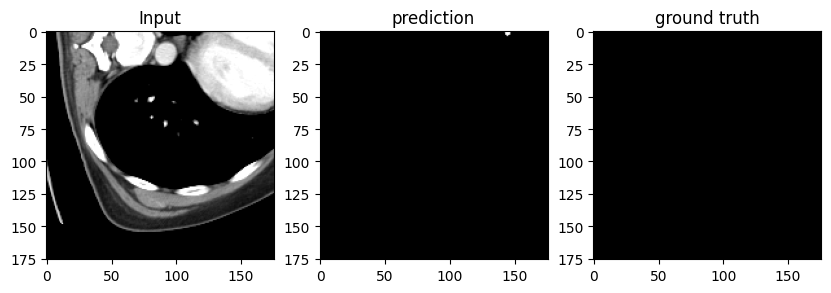

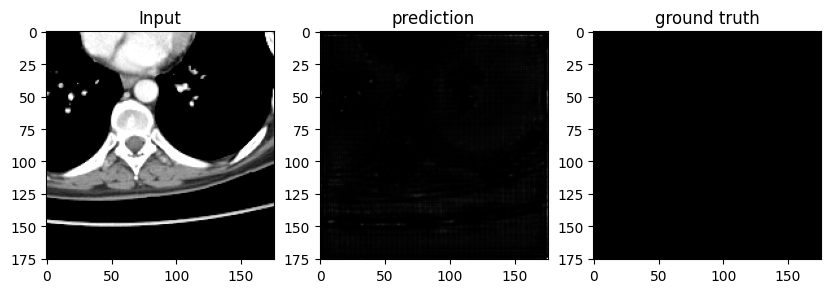

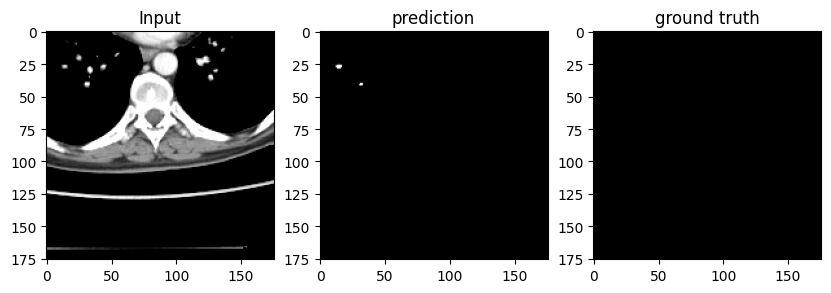

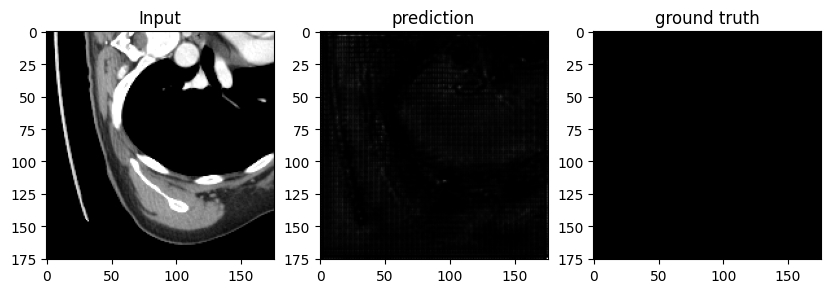

torch.Size([4, 1, 160, 176, 176])


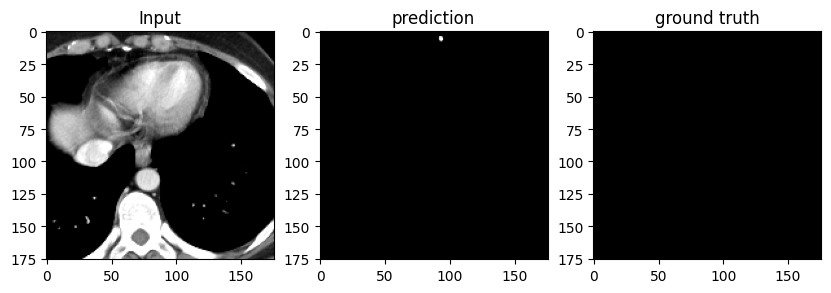

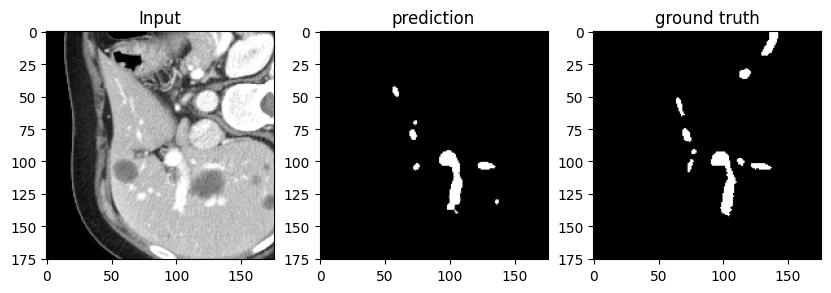

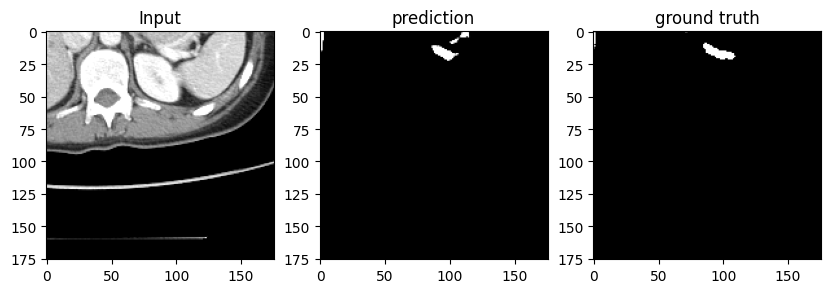

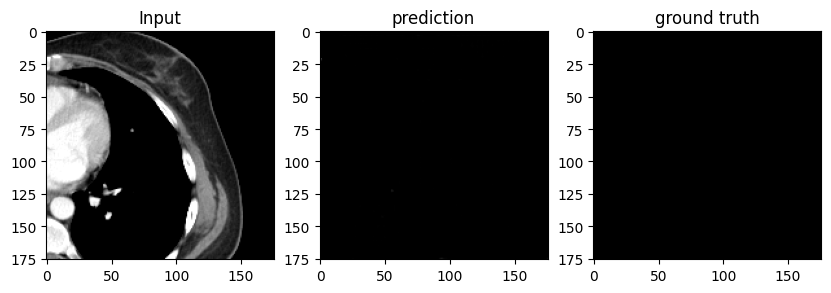

torch.Size([4, 1, 160, 176, 176])


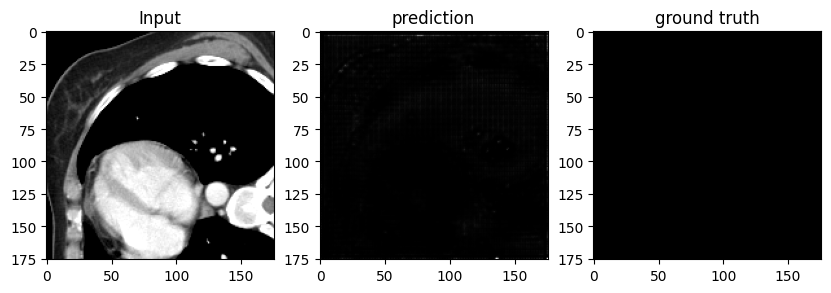

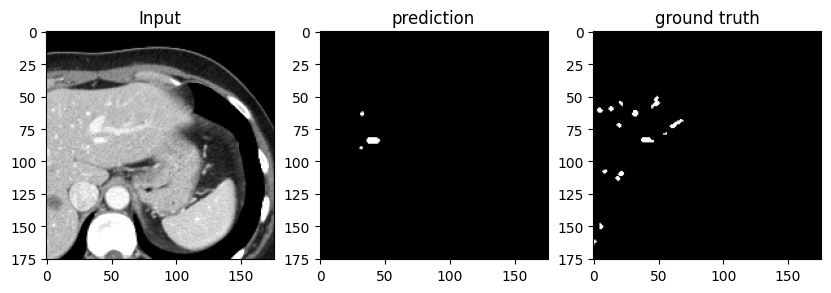

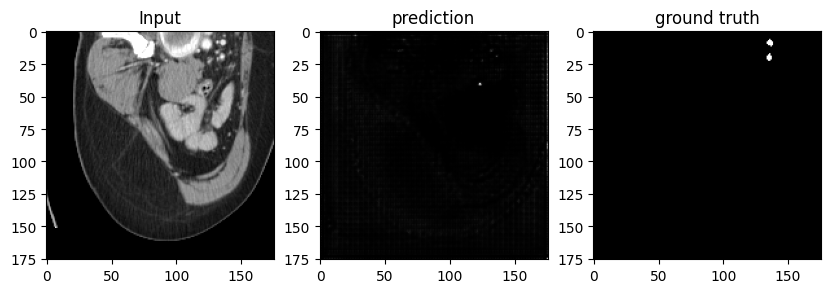

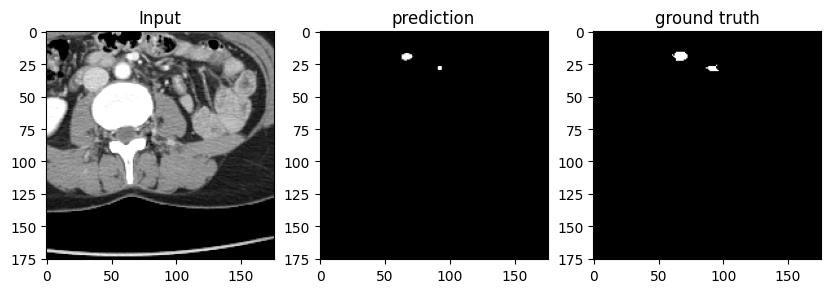

torch.Size([4, 1, 160, 176, 176])


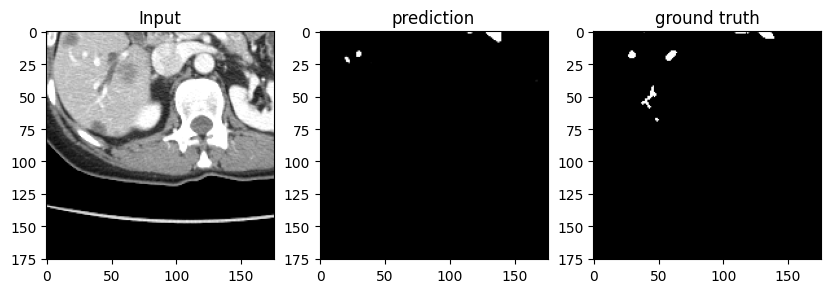

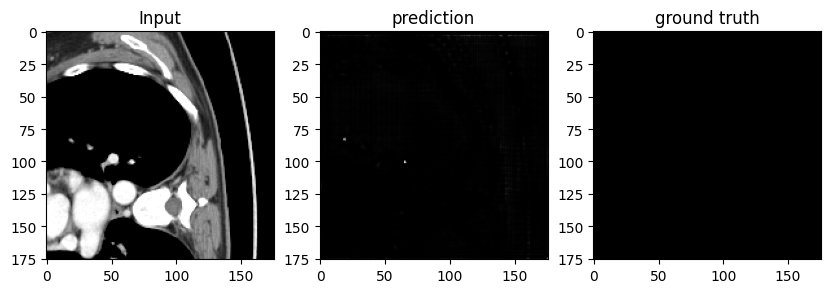

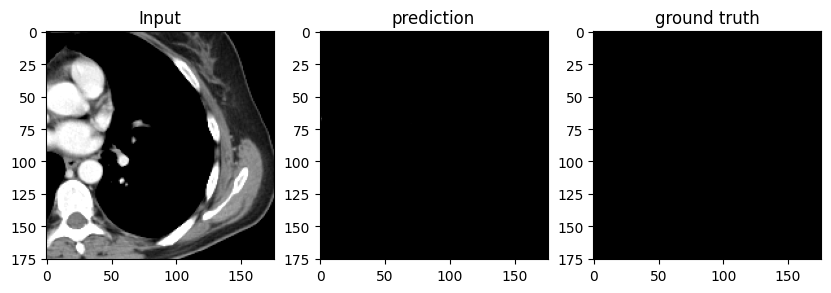

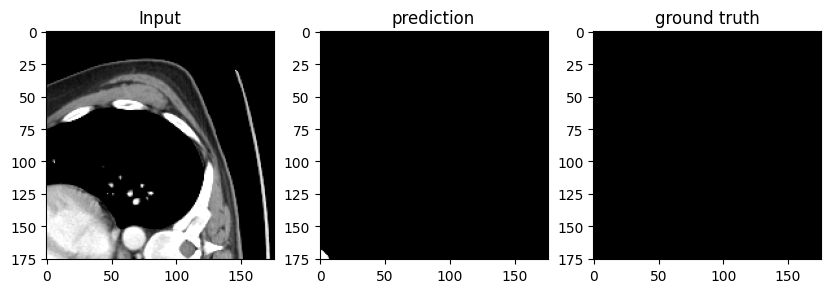

torch.Size([4, 1, 160, 176, 176])


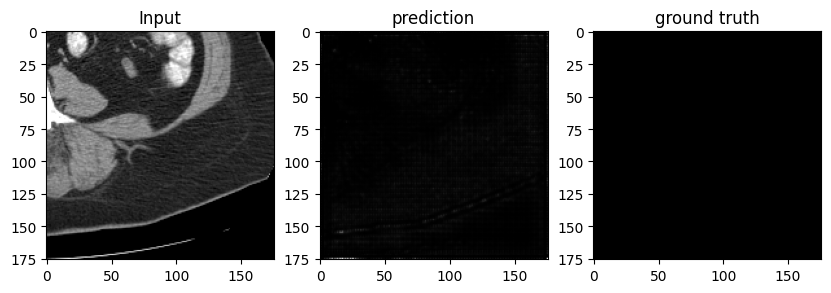

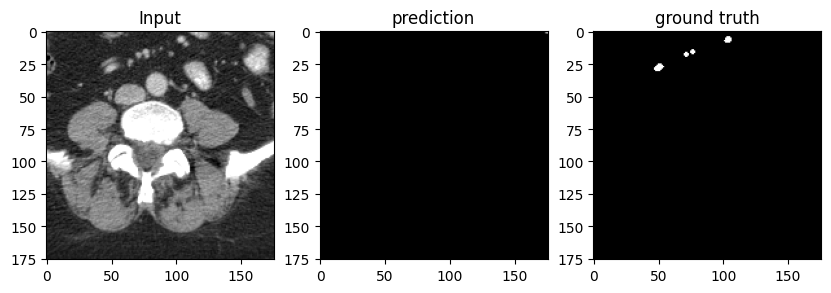

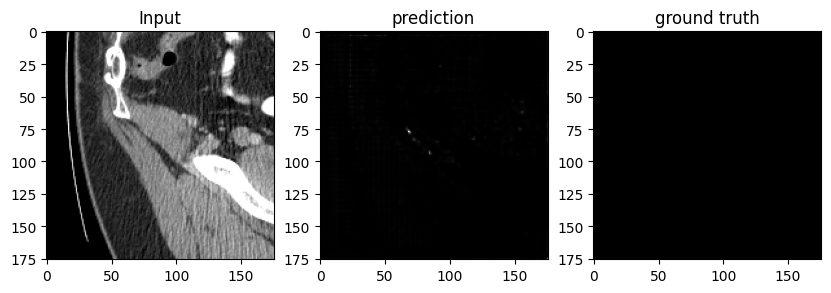

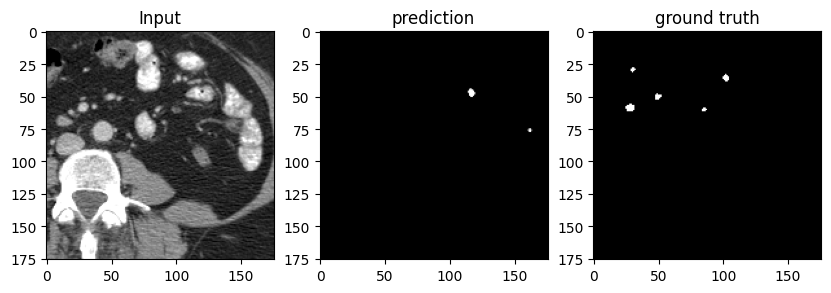

torch.Size([4, 1, 160, 176, 176])


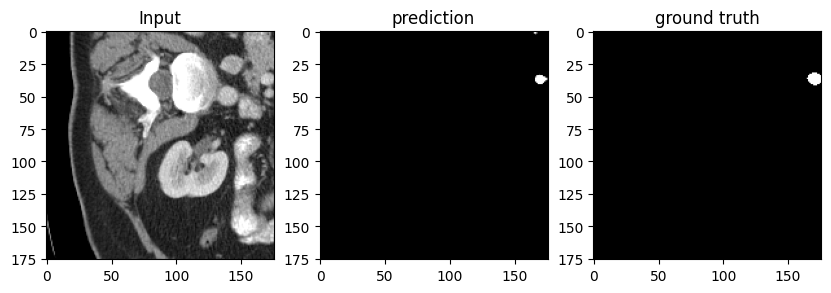

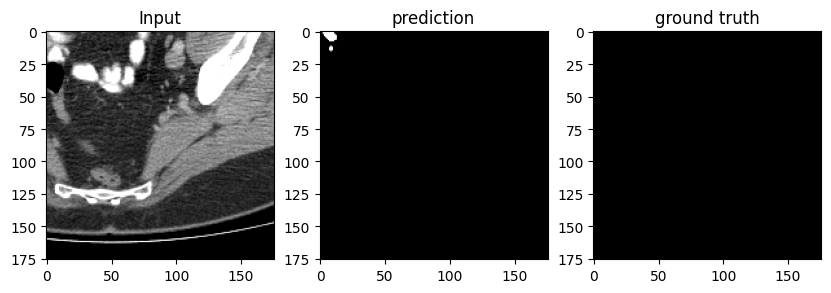

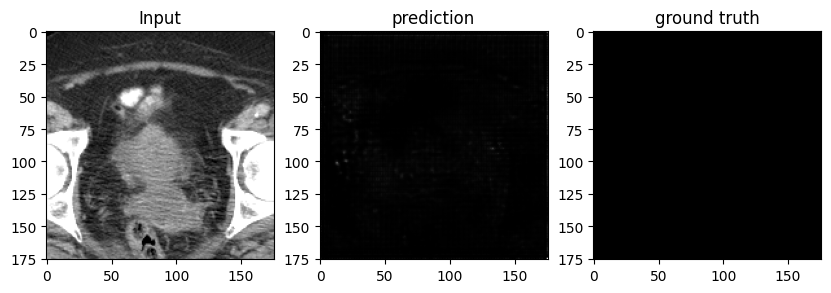

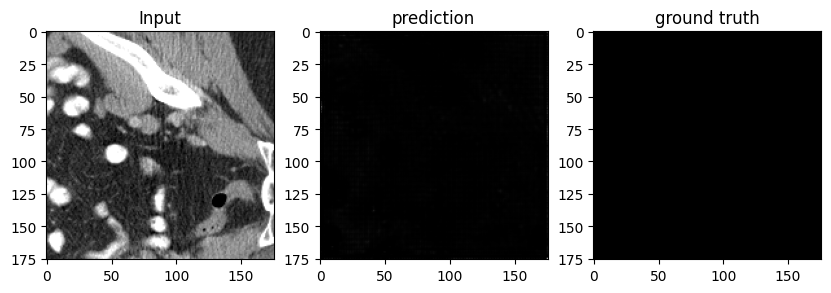

torch.Size([4, 1, 160, 176, 176])


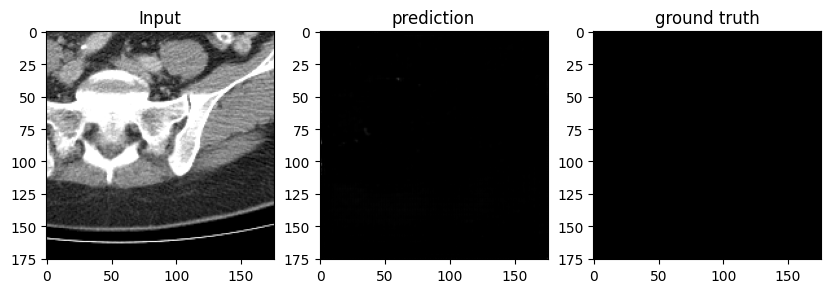

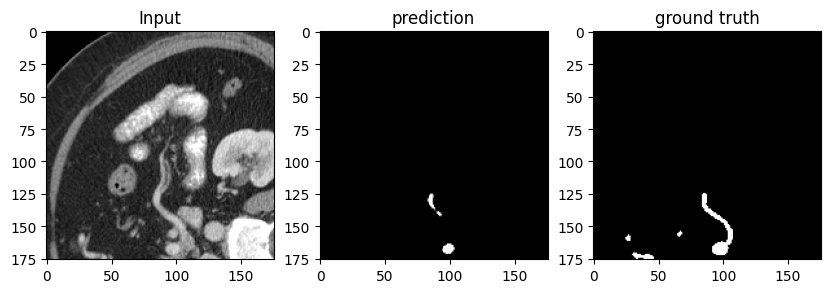

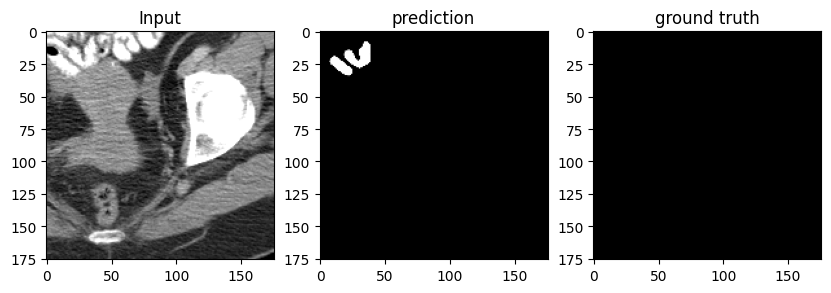

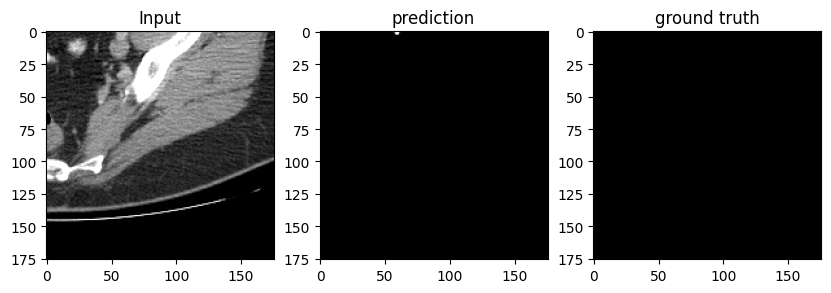

torch.Size([4, 1, 160, 176, 176])


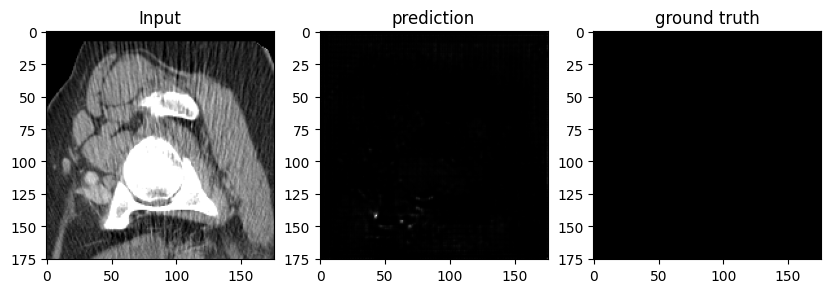

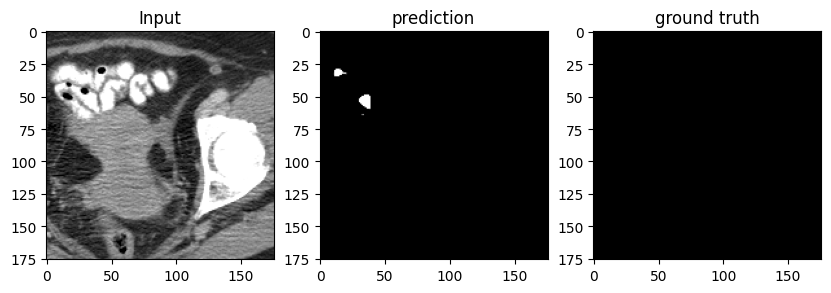

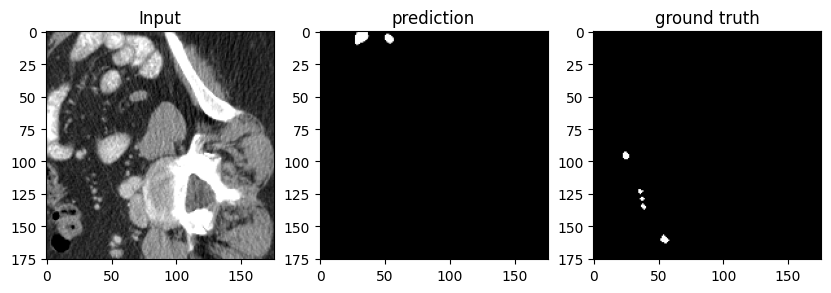

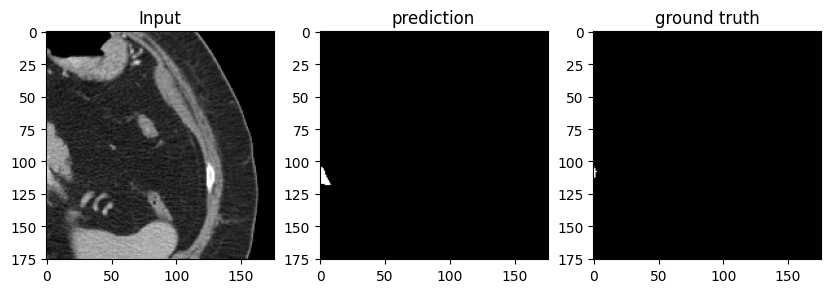

In [3]:
import importlib
importlib.reload(nb)
nb.plot_predictions(test_dataloader, model, 45)

In [ ]:

writer.add_graph(model, next(iter(train_dl))[0].to(device))
writer.flush()

/home/casimir/UNI/WS_22/KAP/venv/lib/python3.11/site-packages/torch/jit/_trace.py:1084: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 715 / 20971520 (0.0%)
Greatest absolute difference: 4.5299530029296875e-05 at index (3, 0, 79, 191, 75) (up to 1e-05 allowed)
Greatest relative difference: 0.0896358543417367 at index (1, 0, 69, 116, 80) (up to 1e-05 allowed)
  _check_trace(
